In [14]:
def shapiro_wilk(data_values, coefficient_table_Ain, alpha, critical_value_table_W):
    # Finding the value of n (sample size)
    n = len(data_values)
    if n > 30 or n < 3:
        return 'Error: Sample size greater than 30 or less than 3'
    
    # Finding the value of i
    i_ = [i for i in range(1, (n // 2) + 1)]
    
    # Finding the value of n - (i - 1)
    n_minus_i_minus_1 = []
    for i in i_:
        n_minus_i_minus_1.append(n - (i - 1))
    
    # Finding the value of Ai,n
    Ain = []
    for i in range(1, (n // 2) + 1):
        Ain.append(coefficient_table_Ain.loc[(i - 1, str(n))])

    # Finding the value of X(n-(i-1)) in the list of values
    X_n_minus_i_minus_1 = []
    for i in range(1, (n // 2) + 1):
        X_n_minus_i_minus_1.append(data_values[n - (i - 1) - 1])

    # Finding the value of Xi in the list of values
    Xi = []
    for i in i_:
        Xi.append(data_values[i - 1])

    # Finding the value of Ai,n times (X(n-(i-1)) - Xi)
    values_Bi = []
    sum_Bi = 0
    for i in range(1, (n // 2) + 1):
        values_Bi.append(Ain[i - 1] * (X_n_minus_i_minus_1[i - 1] - Xi[i - 1]))
        sum_Bi += values_Bi[i - 1]

    # Finding the sample value of squared absolute deviations (or the variance times n-1)
    denominator_Wcalc = np.var(data_values, ddof=1) * (n - 1)

    # Finding the value of W calculated
    Wcalc = (sum_Bi**2) / denominator_Wcalc

    # Finding the critical W value (W critical)
    Wcrit = critical_value_table_W.loc[(n - 3, str(alpha))]

    if Wcrit > Wcalc:
        print("Wcrit = %.4f > Wcalc = %.4f" % (Wcrit, Wcalc))
        print(f"Accept the null hypothesis H0 that the sample follows a normal distribution N({np.mean(data_values), np.var(data_values)}).")
    else:
        print("Wcrit = %.4f < Wcalc = %.4f" % (Wcrit, Wcalc))
        print("Reject the null hypothesis H0 that the sample follows a normal distribution")

    # Creating a pandas DataFrame with all the columns
    df = pd.DataFrame({'i': i_, 'n - (i - 1)': n_minus_i_minus_1, 'Ai,n': Ain, 'X(n-(i-1))': X_n_minus_i_minus_1,
                       'Xi': Xi, 'Bi Values': values_Bi})

    print(df)
    return df


In [33]:
import pandas as pd
import numpy as np

# Read the coefficients table (Coeficiente.csv) and critical values table (tabela_Wcrit_Shapiro.csv) from CSV files
coefficients_Ain = pd.read_csv('Coeficientes_ain.csv', sep=';', decimal=',')

critical_values_table = pd.read_csv('tabela_Wcrit.csv', sep=';', decimal=',')
critical_values_table = critical_values_table.drop(['Unnamed: 10'], axis=1)
critical_values_table = critical_values_table.drop(28)

# Convert the "tamanho n" column to integer type
critical_values_table["tamanho n"] = critical_values_table["tamanho n"].astype(int)
valores = np.random.normal(0,1,20)
alpha = 0.01

# Use the shapiro_wilk function with the updated values
shapiro_wilk(valores, coefficients_Ain, alpha, critical_values_table)

Wcrit = 0.8680 > Wcalc = 0.0356
Accept the null hypothesis H0 that the sample follows a normal distribution N((-0.10624820559595767, 1.2846214064694952)).
    i  n - (i - 1)    Ai,n  X(n-(i-1))        Xi  Bi Values
0   1           20  0.4734   -0.509500 -0.324692  -0.087488
1   2           19  0.3211    0.292335 -0.455271   0.240056
2   3           18  0.2565   -0.318358  1.608858  -0.494331
3   4           17  0.2085    1.279416  0.444688   0.174041
4   5           16  0.1686    1.558065 -2.127715   0.621422
5   6           15  0.1334   -1.542798 -0.259114  -0.171243
6   7           14  0.1013    0.956459  1.256183  -0.030362
7   8           13  0.7011    0.910252  0.022339   0.622516
8   9           12  0.0422   -0.600820 -2.190677   0.067092
9  10           11  0.0140   -0.516867 -1.607749   0.015272


,i,n - (i - 1),"Ai,n",X(n-(i-1)),Xi,Bi Values
0,1,20,0.4734,-0.509500,-0.324692,-0.087488
1,2,19,0.3211,0.292335,-0.455271,0.240056
2,3,18,0.2565,-0.318358,1.608858,-0.494331
3,4,17,0.2085,1.279416,0.444688,0.174041
4,5,16,0.1686,1.558065,-2.127715,0.621422
5,6,15,0.1334,-1.542798,-0.259114,-0.171243
6,7,14,0.1013,0.956459,1.256183,-0.030362
7,8,13,0.7011,0.910252,0.022339,0.622516
8,9,12,0.0422,-0.600820,-2.190677,0.067092
9,10,11,0.0140,-0.516867,-1.607749,0.015272


In [16]:
import numpy as np
import pandas as pd

from scipy.stats import norm, ksone
"""As funções devem receber somente o conjunto de dados e o aplha, media e desvio padrão devem ser calculados na função"""
def kolmogorov_smirnov(data_values, sample_mean, sample_standard_deviation, alpha):
    # Sorting the list of values without duplicates
    sorted_data = sorted(data_values)
    Xi = sorted(set(sorted_data))
    # Calculating the absolute frequency of each value
    freq_abs = [sorted_data.count(i) for i in Xi]
    # Calculating the cumulative frequency
    freq_cumulative = []
    for i in range(len(freq_abs)):
        if i == 0:
            freq_cumulative.append(freq_abs[i])
        else:
            freq_cumulative.append(freq_abs[i] + freq_cumulative[i-1])
   
    # Calculating the relative frequency
    freq_rel = [x / freq_cumulative[-1] for x in freq_abs]
    # Calculating the cumulative relative frequency
    freq_rel_cumulative = []
    for i in range(len(freq_abs)):
            freq_rel_cumulative.append(freq_cumulative[i] / freq_cumulative[-1])
    # Calculating the values of Zi
    Zi = [(x - sample_mean) / sample_standard_deviation for x in Xi]
    # Calculating the expected frequency Fwaited
    freq_expected = [norm.cdf(z) for z in Zi]
    # Calculating |Fwaited(Xi) - Frac(Xi)| for each value of Xi
    Fwaited_minus_Frac = [abs(freq_expected[i] - freq_rel_cumulative[i]) for i in range(len(Xi))]
    # Calculating |Fwaited(Xi) - Frac(Xi-1)| for each value of Xi
    Fwaited_minus_Frac_1 = [freq_expected[0]] + [abs(freq_expected[i] - freq_rel_cumulative[i-1]) for i in range(1, len(Xi))]
    # Calculating Dcalc
    max_Fwaited_minus_Frac = max(Fwaited_minus_Frac)
    max_Fwaited_minus_Frac_1 = max(Fwaited_minus_Frac_1)
    Dcalc = max(max_Fwaited_minus_Frac, max_Fwaited_minus_Frac_1)

    # Calculating Dtabela (critical D)
    if len(sorted_data) <= 35:
        Dtab = ksone.ppf(1 - alpha/2, len(sorted_data))
    else:
        if alpha == 0.2:
            Dtab = 1.07 / np.sqrt(len(sorted_data))
        elif alpha == 0.15:
            Dtab = 1.14 / np.sqrt(len(sorted_data))
        elif alpha == 0.10:
            Dtab = 1.22 / np.sqrt(len(sorted_data))
        elif alpha == 0.05:
            Dtab = 1.36 / np.sqrt(len(sorted_data))
        elif alpha == 0.01:
            Dtab = 1.63 / np.sqrt(len(sorted_data))

    if Dcalc < Dtab:
        print("Dcalc = %.4f < Dtab = %.4f" % (Dcalc, Dtab))
        print("Accept the null hypothesis that the sample follows a normal distribution.")
    else:
        print("Dcalc = %.4f > Dtab = %.4f" % (Dcalc, Dtab))
        print("Reject the null hypothesis that the sample follows a normal distribution")

    # Creating a pandas dataframe with all frequency columns
    df = pd.DataFrame({'Xi': Xi, 'FreqAbs': freq_abs,"FreqRelative":freq_rel, 'FreqCumulative': freq_cumulative, 'FreqRelCumulative': freq_rel_cumulative, 'Zi': Zi, 'Fwaited': freq_expected,
                       '(Fwaited - Frac': Fwaited_minus_Frac, 'Fwaited - Frac-1': Fwaited_minus_Frac_1})
    print(df)
    return df


Dcalc = 0.0798 < Dtab = 0.1220
Accept the null hypothesis that the sample follows a normal distribution.
          Xi  FreqAbs  FreqRelative  FreqCumulative  FreqRelCumulative  \
0  -2.156409        1          0.01               1               0.01   
1  -1.979432        1          0.01               2               0.02   
2  -1.943047        1          0.01               3               0.03   
3  -1.534030        1          0.01               4               0.04   
4  -1.485758        1          0.01               5               0.05   
..       ...      ...           ...             ...                ...   
95  1.985098        1          0.01              96               0.96   
96  2.117945        1          0.01              97               0.97   
97  2.364583        1          0.01              98               0.98   
98  2.373364        1          0.01              99               0.99   
99  2.956588        1          0.01             100               1.00   

      

array([[<Axes: title={'center': 'Xi'}>,
        <Axes: title={'center': 'FreqAbs'}>,
        <Axes: title={'center': 'FreqRelative'}>],
       [<Axes: title={'center': 'FreqCumulative'}>,
        <Axes: title={'center': 'FreqRelCumulative'}>,
        <Axes: title={'center': 'Zi'}>],
       [<Axes: title={'center': 'Fwaited'}>,
        <Axes: title={'center': '(Fwaited - Frac'}>,
        <Axes: title={'center': 'Fwaited - Frac-1'}>]], dtype=object)

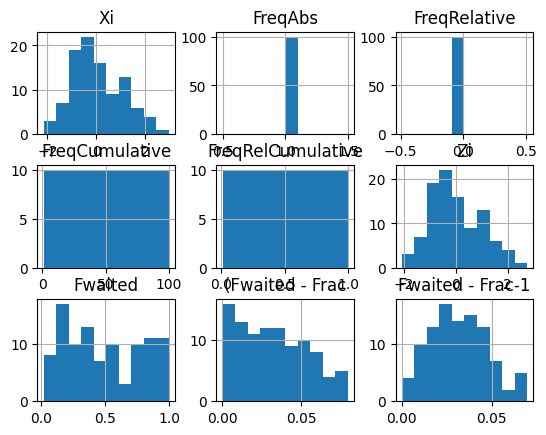

In [ ]:
values = np.random.normal(0, 1, 100)
sample_mean = np.mean(values)
sample_standard_deviation = np.std(values)
alpha = 0.1

# Call the Kolmogorov-Smirnov test function
df = kolmogorov_smirnov(values, sample_mean, sample_standard_deviation, alpha)
df.hist()

Z-test

In [ ]:
import numpy as np
from scipy import stats

def z_test(sample_size, population, sample_mean, population_std_dev, alpha, two_tailed=True):
    # Calculate Zcalc
    numerator_zcalc = 0
    for i in range (len(population)):
        numerator_zcalc += sample_mean - population[i]
    denominator_zcalc = population_std_dev / np.sqrt(sample_size)
    Zcalc = numerator_zcalc / denominator_zcalc
    # Find Zcrit
    Zcrit = stats.norm.ppf(1 - alpha/2) if two_tailed else stats.norm.ppf(1 - alpha)

    # Print the results
    print(f"Zcalc = {Zcalc}")
    print(f"Zcrit = {Zcrit}")
    #module of the zcalc - zcrit
    if abs(Zcalc) < abs(Zcrit):
        print(f"|Zcalc| = {abs(Zcalc)} < Zcrit = {abs(Zcrit)}")
        print(f"Accept the null hypothesis that the population mean is {sample_mean}")
    else:
        print(f"|Zcalc| = {abs(Zcalc)} > Zcrit = {abs(Zcrit)}")
        print(f"Reject the null hypothesis that the population mean is {sample_mean}")


In [ ]:

population = [4,6,2,10,10,12,14,16,18,20]
sample_size = len(population)
sample_std_dev = np.std(population)
alpha = 0.05
sample_mean = np.mean(population)

# Call the Z-test function
z_test(sample_size, population, sample_mean, sample_std_dev, alpha, two_tailed=False)

Kolmogorov_smirnov


In [ ]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = mean(data1), mean(data2)
 # calculate standard errors
 se1, se2 = sem(data1), sem(data2)
 # standard error on the difference between the samples
 sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
 print('Accept null hypothesis that the means are equal.')
else:
 print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
 print('Reject the null hypothesis that the means are equal.')


In [ ]:
import pandas as pd

# Read the coefficients table (Coeficiente.csv) and critical values table (tabela_Wcrit_Shapiro.csv) from CSV files
coefficients_Ain = pd.read_csv('Coeficientes_ain.csv', sep=';', decimal=',')

critical_values_table = pd.read_csv('tabela_Wcrit.csv', sep=';', decimal=',')
critical_values_table = critical_values_table.drop(['Unnamed: 10'], axis=1)
critical_values_table = critical_values_table.drop(28)

# Convert the "tamanho n" column to integer type
critical_values_table["tamanho n"] = critical_values_table["tamanho n"].astype(int)
valores = np.random.normal(0, 1, 20)
alpha = 0.01

# Use the shapiro_wilk function with the updated values
shapiro_wilk(valores, coefficients_Ain, alpha, critical_values_table)

In [ ]:
values = np.random.normal(0, 1, 100)
sample_mean = np.mean(values)
sample_standard_deviation = np.std(values)
alpha = 0.1

# Call the Kolmogorov-Smirnov test function
df = kolmogorov_smirnov(values, sample_mean, sample_standard_deviation, alpha)
df.hist()

In [ ]:
import numpy as np
from scipy import stats

def z_test(sample_size, population, sample_mean, population_std_dev, alpha, two_tailed=True):
    # Calculate Zcalc
    numerator_zcalc = 0
    for i in range (len(population)):
        numerator_zcalc += sample_mean - population[i]
    denominator_zcalc = population_std_dev / np.sqrt(sample_size)
    Zcalc = numerator_zcalc / denominator_zcalc
    # Find Zcrit
    Zcrit = stats.norm.ppf(1 - alpha/2) if two_tailed else stats.norm.ppf(1 - alpha)

    # Print the results
    print(f"Zcalc = {Zcalc}")
    print(f"Zcrit = {Zcrit}")
    #module of the zcalc - zcrit
    if abs(Zcalc) < abs(Zcrit):
        print(f"|Zcalc| = {abs(Zcalc)} < Zcrit = {abs(Zcrit)}")
        print(f"Accept the null hypothesis that the population mean is {sample_mean}")
    else:
        print(f"|Zcalc| = {abs(Zcalc)} > Zcrit = {abs(Zcrit)}")
        print(f"Reject the null hypothesis that the population mean is {sample_mean}")


T-Student Test